In [1]:
# simulating the data we had yesterday
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2-D Two Class Gaussian Data Generator

In [4]:
D = 2 # dimensions
C = 2 # number of classes
N = int(C * 1e3) # total number of points that we be generated

In [5]:
X1 = np.random.randn((N//C),D) + np.array([0,-2]) # dividing total amount of points by classes, and the dimensions will be D
X2 = np.random.randn((N//C),D) + np.array([-2,2]) # wrote 0 

In [6]:
# Combining the datasets
X = np.vstack((X1,X2))
# SQL equal of this stack
# Union will keep the stack 
# Union all will be 

In [7]:
# Generating the labels, 0 and 1
y = np.array([0]* (N//C) + [1] * (N//C)) 

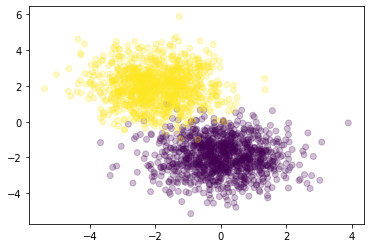

In [9]:
plt.figure()
plt.scatter(X[:,0] , X[:,1] , c = y, alpha = .25)

In [10]:
# ADD A CONTOUR PLOT OF THIS!!!!!

## 2-D Three Classes - Guassian Data

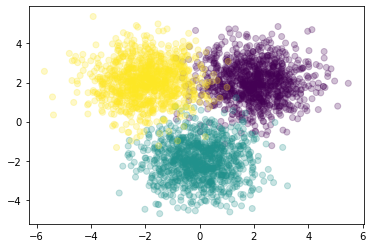

In [11]:
D = 2 # 
C = 3 # 
N = int(C * 1e3) # C * 1000
X1 = np.random.randn((N//C),D) + np.array([2,2]) #
X2 = np.random.randn((N//C),D) + np.array([0,-2]) #  
X3 = np.random.randn((N//C),D) + np.array([-2,2]) #  

X = np.vstack((X1,X2,X3))
y = np.array(([0]* (N//C)) + ([1] * (N//C)) + ([2] * (N//C)) ) 

plt.figure()
plt.scatter(X[:,0] , X[:,1] , c = y, alpha = .25)

# Converting the data into a CSV

In [12]:
DataSet = pd.DataFrame(X)
Yset = pd.DataFrame(y)

In [13]:
DataSet[2] = Yset # we know X is two dimensions, so 2 is empy

In [14]:
DataSet.head()

,0,1,2
0,2.850206,0.925106,0
1,-0.864567,3.242728,0
2,3.032149,3.263771,0
3,1.535980,-0.582925,0
4,2.549100,1.349371,0


In [15]:
DataSet.to_csv("TrippleGauss.csv")

In [16]:
DataSet.info

<bound method DataFrame.info of              0         1  2
0     2.850206  0.925106  0
1    -0.864567  3.242728  0
2     3.032149  3.263771  0
3     1.535980 -0.582925  0
4     2.549100  1.349371  0
...        ...       ... ..
2995 -0.894670  2.162091  2
2996 -2.936450  1.534780  2
2997 -0.573792 -0.247455  2
2998 -2.065725  0.366844  2
2999 -1.393795  1.707161  2

[3000 rows x 3 columns]>

In [17]:
class KNNB():
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predictKNN(self,X, K, epsilon = 1e-3):
        N = len(X) # has no self, this was the X it was given in the parameters, self.X and X are different variables
        y_hat = np.zeros(N)
        
        for i in range(N): # we are going through every single point. So thats a good thing or bad thing
            #   use cases... wanted to find out all the members of a neighborhood 
            #   use cases... have map of the US that is built from lights that satellites can see, and we want to map the cities using that light
            #   use cases... a model that mapped the disbursion of the dieses of the rona using the light map model from satellites 
            dist2 = np.sum((self.X - X[i])**2, axis=1) # by substracting from the ith member of x, we are getting the distance of each
            idxt = np.argsort(dist2)[:K] # going to sort to each based on the distance 
            gamma_K = 1/(np.sqrt(dist2[idxt])+ epsilon) # we add epislon to avoid division by 0
            y_hat[i] =  np.bincount(self.y[idxt], weights = gamma_K).argmax() # we want the smallest gamma_k
            # taking the biggest chunks and summing them
            # getting the probability that 
            # bincount produces the probability
            # the argmax gives the actual value of the class, the maximum class
            # bincount adds chunks, we're getting the distances of the sections we're adding
            # 
        return  y_hat

In [23]:
def main():
    D = 2 # 
    C = 3 # 
    N = int(C * 1e3) # C * 1000
    X1 = np.random.randn((N//C),D) + np.array([2,2]) #
    X2 = np.random.randn((N//C),D) + np.array([0,-2]) #  
    X3 = np.random.randn((N//C),D) + np.array([-2,2]) #  

    X = np.vstack((X1,X2,X3))
    y = np.array(([0]* (N//C)) + ([1] * (N//C)) + ([2] * (N//C)) ) 
    
    knnInstance = KNNB()
    knnInstance.fit(X,y)
    
    X_vis = np.random.uniform(-6,6,(int(N*10),D))
    y_hat_vis = knnInstance.predictKNN(X_vis,150)# it works for this data set, we can change 150
    
    
    plt.figure()
    plt.scatter(X[:,0] , X[:,1] , c = y, alpha = .65)
    plt.scatter(X_vis[:,0] , X_vis[:,1] , c = y_hat_vis, alpha = .01)

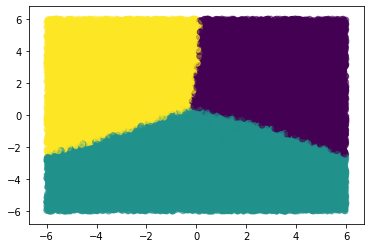

In [26]:
if __name__ == "__main__":
    main()

In [25]:
def main():
    D = 2 # 
    C = 3 # 
    N = int(C * 1e3) # C * 1000
    X1 = np.random.randn((N//C),D) + np.array([2,2]) #
    X2 = np.random.randn((N//C),D) + np.array([0,-2]) #  
    X3 = np.random.randn((N//C),D) + np.array([-2,2]) #  

    X = np.vstack((X1,X2,X3))
    y = np.array(([0]* (N//C)) + ([1] * (N//C)) + ([2] * (N//C)) ) 
    
    knnInstance = KNNB()
    knnInstance.fit(X,y)
    
    X_vis = np.random.uniform(-6,6,(int(N*10),D))
    y_hat_vis = knnInstance.predictKNN(X_vis,150)# it works for this data set, we can change 150
    
    
    plt.figure()
    plt.scatter(X[:,0] , X[:,1] , c = y, alpha = .5)
    plt.scatter(X_vis[:,0] , X_vis[:,1] , c = y_hat_vis, alpha = .55)